# 4. Regresión Lineal – popularity (solo canciones con low_popularity = 0)

Estimar cuánta popularidad tendrá una canción popular.

Predice un valor numérico de popularity (entre 0 y 100) en canciones reales. Es el modelo base.

Evaluación del modelo de Regresión Lineal:
MAE:  13.24
RMSE: 16.99
R2:   0.39
Gráfico guardado en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\regresion_lineal_predicciones.png


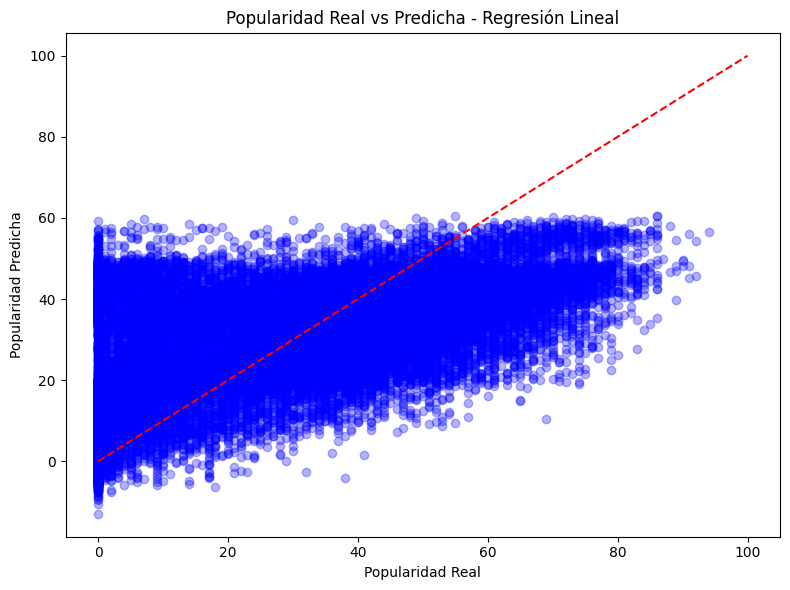

Modelo guardado en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\models\modelo_regresion_lineal.pkl


In [1]:
# 1. Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import numpy as np
import matplotlib.pyplot as plt

# 2. Cargar la base de datos 
file_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\data\tracks_limpio_con_low_popularity.csv"
df = pd.read_csv(file_path)

# 3. Seleccionar variables para el modelo
features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "valence", "tempo",
    "duration_ms", "explicit", "release_year"
]
target = "popularity"

X = df[features]
y = df[target]

# 4. Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear y entrenar el modelo de Regresión Lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# 6. Realizar predicciones y evaluar el modelo
y_pred = modelo_lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo de Regresión Lineal:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2:   {r2:.2f}")

# Gráfico de predicción vs valor real
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # Línea ideal
plt.title("Popularidad Real vs Predicha - Regresión Lineal")
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.tight_layout()

# Guardar la imagen en carpeta local
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\regresion_lineal_predicciones.png"
plt.savefig(img_path, dpi=300)
print(f"Gráfico guardado en: {img_path}")
plt.show()

# 7. Guardar el modelo entrenado
modelo_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\models\modelo_regresion_lineal.pkl"
joblib.dump(modelo_lr, modelo_path)

print(f"Modelo guardado en: {modelo_path}")
